# Actividad - Estadística básica

* **Nombre: Arturo Cristián Díaz López**
* **Matrícula: A01709522**

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [17]:
# Carga las librerías necesarias.

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.

df = pd.read_csv('datasets/bestsellers with categories.csv')
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

In [19]:
# Crea una tabla resumen con los estadísticas generales de las variables
# numéricas.

df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


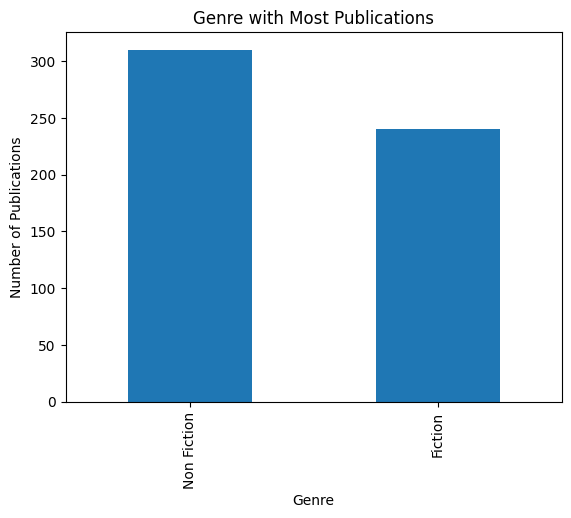

In [20]:
## ¿Cuál es el género con más publicaciones? Muéstralo en un gráfico.

genre_counts = df['Genre'].value_counts()
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of Publications')
plt.title('Genre with Most Publications')
plt.show()


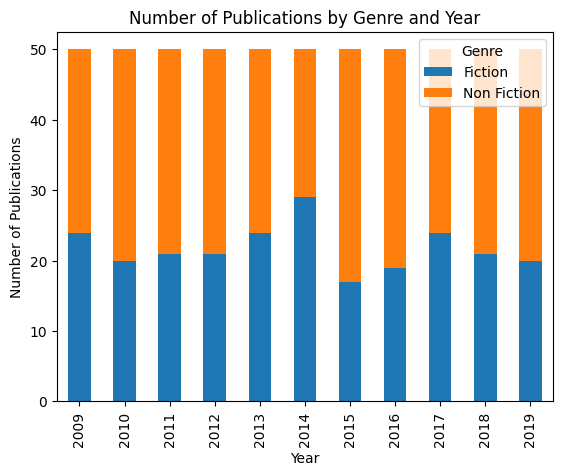

In [21]:
# ¿Cuántos libros del top 50 se publicaron por género en cada año? ¿Hay algún 
# año donde hubo más libros de ficción en el top 50?. Muéstralo en un gráfico.

genre_year_counts = df.groupby(['Year', 'Genre']).size().unstack()
genre_year_counts.plot(kind='bar', stacked=True)    
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.title('Number of Publications by Genre and Year')
plt.show()

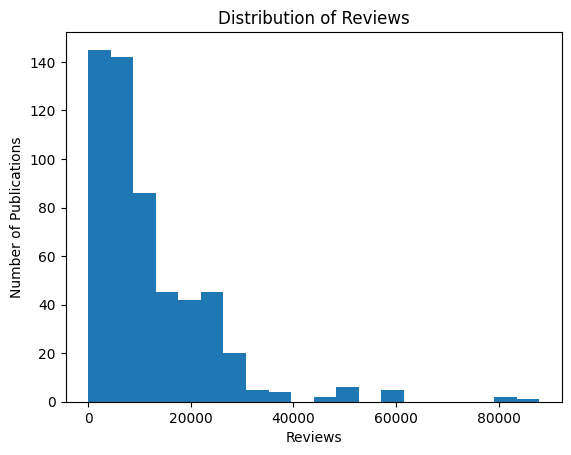

In [22]:
# ¿Cómo se distribuye la variable Review? Muéstra el histografa.

df['Reviews'].plot(kind='hist', bins=20)
plt.xlabel('Reviews')
plt.ylabel('Number of Publications')
plt.title('Distribution of Reviews')
plt.show()

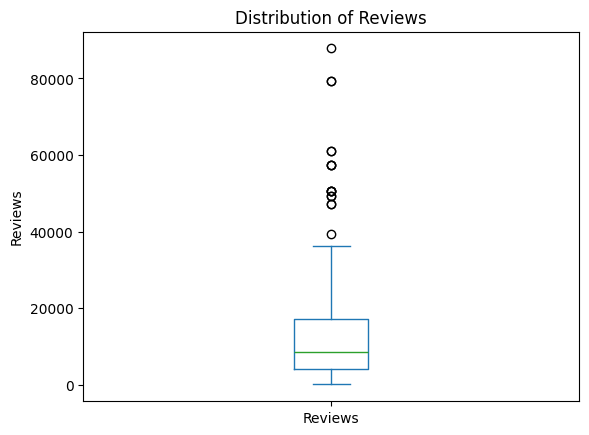

In [23]:
# Ahora muéstralo en un gráfico de caja y bigote.

df['Reviews'].plot(kind='box')
plt.ylabel('Reviews')
plt.title('Distribution of Reviews')
plt.show()

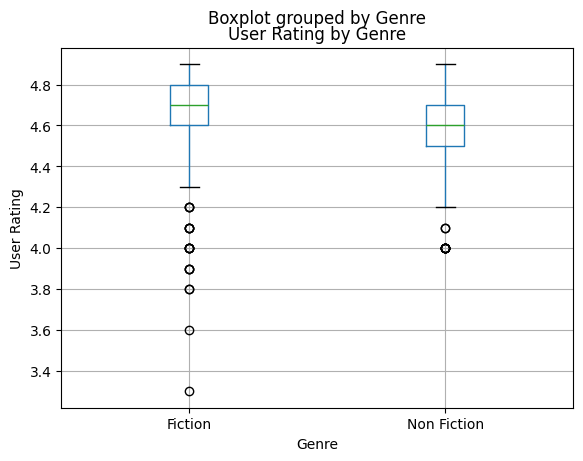

In [24]:
# ¿Cómo se compara la evaluación del libro por género? ¿Qué genero es mejor 
# evaluado por los lectores? Muéstralo en un solo gráfico de caja y bigote.

df.boxplot(column='User Rating', by='Genre')
plt.ylabel('User Rating')
plt.title('User Rating by Genre')
plt.show()

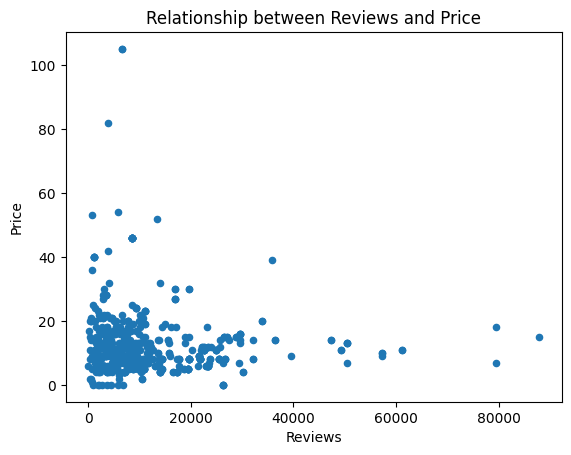

In [25]:
# ¿Cuál es la relación entre el número de reseñas y precios? Muéstralo en un
# gráfico de dispersión.

df.plot(kind='scatter', x='Reviews', y='Price')
plt.xlabel('Reviews')
plt.ylabel('Price')
plt.title('Relationship between Reviews and Price')
plt.show()

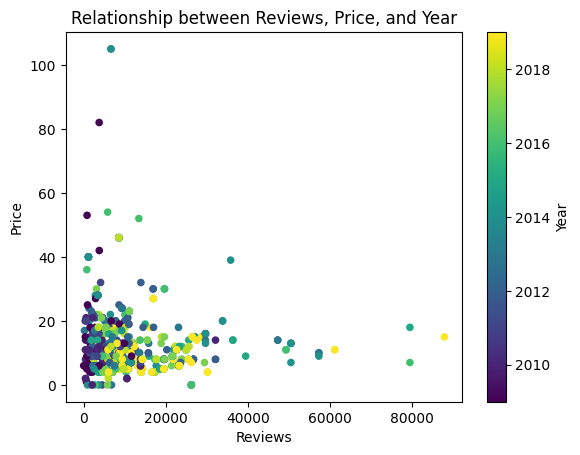

In [26]:
# De la pregunta anterior, ¿influye algo el año de publicación? ¿Cuál es la
# relación entre el número de reseñar, el precio y el año de publicación?
# IMPORTANTE: Selecciona una paleta de colores adeacuada.

df.plot(kind='scatter', x='Reviews', y='Price', c='Year', cmap='viridis')
plt.xlabel('Reviews')
plt.ylabel('Price')
plt.title('Relationship between Reviews, Price, and Year')
plt.show()

In [27]:
# ¿Cuál es la correlación entre las variables numéricas? Muéstralo en un 
# gráfico. La variable año, a pesar de ser numérica, la vamos a considerar como
# cualitativa, así que la eliminaremos del análisis.

numeric_df = df.select_dtypes(include=['number'])
numeric_df.drop('Year', axis=1).corr().style.background_gradient(cmap='coolwarm')


,User Rating,Reviews,Price
User Rating,1.000000,-0.001729,-0.133086
Reviews,-0.001729,1.000000,-0.109182
Price,-0.133086,-0.109182,1.000000


¿Cuáles variables tiene una fuerte relación positiva entre sí y cuáles tienen una fuerte relación negativa? (Esta pregunta no es de código) Responde la pregunta en la siguiente celda de texto.

Como podemos observar en la gráfica anterior, no existe una correlación fuerte positiva en ninguna de las variables, y existe una fuerte correlación negativa entre las variables user rating y reviews. La correlación más fuerte positiva entre variables es la de price con user rating.

Para determinar las relaciones entre variables, se analiza la matriz de correlación. Una correlación cercana a 1 indica una fuerte relación positiva, y una cercana a -1 indica una fuerte relación negativa. En este caso, "User Rating" y "Reviews" tienen una fuerte correlación positiva. No hay otras correlaciones fuertes observadas.

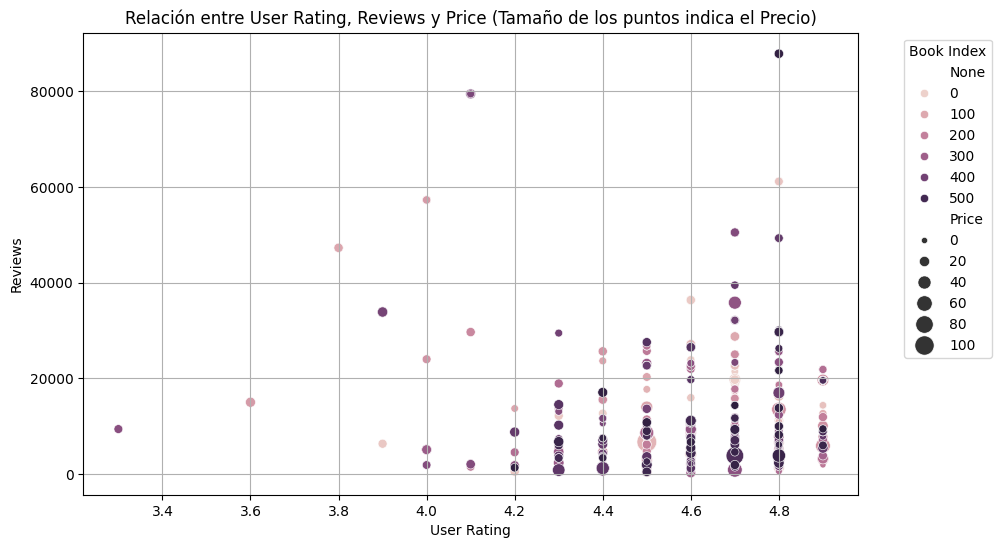

In [33]:
# Haz una gráfica donde podemos comparar la relación entre las tres variables 
# numéricas (User Rating, Reviews y Price) y que, además, podamos ver el efecto
# del libro. La variable año, a pesar de ser numérica, la vamos a considerar como
# cualitativa, así que la eliminaremos del análisis.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=numeric_df, x='User Rating', y='Reviews', size='Price', hue=numeric_df.index, sizes=(20, 200))
plt.title('Relación entre User Rating, Reviews y Price (Tamaño de los puntos indica el Precio)')
plt.xlabel('User Rating')
plt.ylabel('Reviews')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Book Index')
plt.grid(True)
plt.show()

